# Wrangle and analyze data(WeRateDogs)
## Table of Content


<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#1)-Assessing">Assessing</a></li>
<li><a href="#Observations">Observations</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#Analysis-&-Visualizations">Analysis & Visualizations</a></li>
<li><a href="#Source">Sources</a></li>
</ul>

# Introduction
## Project Details

* Data wrangling, which consists of:
  * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked).
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting
  * 1)your data wrangling efforts and 
  * 2) your data analyses and visualizations


**Import libraries and statement**

In [317]:
#Importing packages
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sqlalchemy import create_engine
import twitter
from TwitterAPI import TwitterAPI

# Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

# Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)

**Installing some packages**

In [318]:
import sys
print(sys.executable)

C:\Users\Nvidia\anaconda3\python.exe


In [319]:
#!pip install wordcloud

In [320]:
#!python -m pip install python_twitter

In [321]:
#!python -m pip install TwitterAPI

In [322]:
#!python -m pip install python-twitter

## Gathering Data

In [323]:
#load twitter archive file to pandas df
df_arc = pd.read_csv("twitter-archive-enhanced.csv")

In [324]:
#Download image predictions file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [325]:
#load image prediction file to pandas df
df_img = pd.read_csv("image-predictions.tsv", sep = '\t')

In [326]:
#Load tweets data into pandas df
with open('tweet_json.txt') as file_tweets:
    df_tweet = pd.read_json(file_tweets, lines=True,encoding= 'utf-8')

## Data Assesment & Cleaning
* ###  1) Assessing

In [327]:
# Show out the rows of twitter_archive dataframe:
df_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [328]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [329]:
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,"2,356.00",78.00,78.00,181.00,181.00,"2,356.00","2,356.00"
mean,"742,771,590,321,719,808.00","745,507,917,855,750,656.00","20,141,706,360,873,208.00","772,039,961,038,007,040.00","12,416,983,653,017,580.00",13.13,10.46
std,"68,567,047,444,761,032.00","75,824,920,044,192,880.00","125,279,666,255,236,320.00","62,369,278,105,055,600.00","95,992,535,331,517,536.00",45.88,6.75
min,"666,020,888,022,790,144.00","665,814,696,700,723,200.00","11,856,342.00","666,104,133,288,665,088.00","783,214.00",0.00,0.00
25%,"678,398,938,214,475,776.00","675,741,911,993,464,832.00","308,637,448.75","718,631,497,683,582,976.00","4,196,983,835.00",10.00,10.00
50%,"719,627,934,716,235,776.00","703,870,840,226,598,912.00","4,196,983,835.00","780,465,709,297,995,776.00","4,196,983,835.00",11.00,10.00
75%,"799,337,304,954,252,288.00","825,780,371,286,566,912.00","4,196,983,835.00","820,314,633,777,061,888.00","4,196,983,835.00",12.00,10.00
max,"892,420,643,555,336,192.00","886,266,357,075,128,320.00","840,547,864,354,918,400.00","887,473,957,103,951,872.00","787,461,778,435,289,088.00","1,776.00",170.00


In [330]:
df_arc.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [331]:
df_arc.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Remy         1
Fiji         1
Ike          1
Burt         1
Stuart       1
Name: name, Length: 957, dtype: int64

In [332]:
df_arc[df_arc.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,nan,nan,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,nan,nan,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,nan,nan,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,nan,nan,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,nan,nan,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,"859,196,978,902,773,760.00","4,196,983,835.00",2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,nan,nan,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,nan,nan,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,nan,nan,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",nan,nan,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,nan,nan,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,nan,nan,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,nan,nan,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,nan,nan,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [333]:
df_arc[df_arc.rating_numerator < 5].loc[0:1000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,nan,nan,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,nan,nan,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,nan,nan,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,"666,104,133,288,665,088.00","4,196,983,835.00",2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
765,777885040357281792,nan,nan,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,nan,nan,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,nan,nan,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,nan,nan,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,nan,nan,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,nan,nan,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None


In [334]:
df_arc[df_arc.rating_numerator <5].loc[1000:2000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,nan,nan,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,nan,nan,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1016,746906459439529985,"746,885,919,387,574,272.00","4,196,983,835.00",2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",nan,nan,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1189,718246886998687744,nan,nan,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,nan,nan,NaN,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,nan,nan,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,nan,nan,NaN,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,None,None,None,None
1249,711306686208872448,nan,nan,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,nan,nan,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1303,707420581654872064,nan,nan,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,nan,nan,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1314,706901761596989440,nan,nan,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,nan,nan,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1406,699088579889332224,nan,nan,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,nan,nan,NaN,https://twitter.com/dog_rates/status/699088579889332224/photo/1,3,10,Charl,None,None,None,None
1446,696490539101908992,"696,488,710,901,260,288.00","4,196,983,835.00",2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have

In [335]:
df_arc[df_arc.rating_numerator < 5].loc[2000:3000,:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2038,671550332464455680,"671,544,874,165,002,240.00","4,196,983,835.00",2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,nan,nan,NaN,NaN,1,10,None,None,None,None,None
2070,671122204919246848,nan,nan,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,nan,nan,NaN,https://twitter.com/dog_rates/status/671122204919246848/photo/1,4,10,None,None,None,None,None
2076,670838202509447168,nan,nan,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk,nan,nan,NaN,https://twitter.com/dog_rates/status/670838202509447168/photo/1,4,10,None,None,None,None,None
2079,670826280409919488,nan,nan,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",nan,nan,NaN,https://twitter.com/dog_rates/status/670826280409919488/photo/1,2,10,None,None,None,None,None
2091,670783437142401025,nan,nan,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,nan,nan,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,None,None,None,None
2136,670055038660800512,nan,nan,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 https://t.co/0gY6XTOpn3,nan,nan,NaN,https://twitter.com/dog_rates/status/670055038660800512/photo/1,3,10,Tommy,None,None,None,None
2183,668989615043424256,nan,nan,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,nan,nan,NaN,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,10,Bernie,None,None,None,None
2186,668981893510119424,nan,nan,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Oddly shaped tail. Long pink front legs. I don't think dogs breath underwater sos. 4/10 bad owner https://t.co/0EJXxE9UxW,nan,nan,NaN,https://twitter.com/dog_rates/status/668981893510119424/photo/1,4,10,None,None,None,None,None
2202,668643542311546881,nan,nan,2015-11-23 04:13:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Fascinating dog here. Loves beach. Oddly long nose for dog. Massive ass paws. Hard to cuddle w. 3/10 would still pet https://t.co/IiSdmhkC5N,nan,nan,NaN,https://twitter.com/dog_rates/status/668643542311546881/photo/1,3,10,None,None,None,None,None
2222,668466899341221888,nan,nan,2015-11-22 16:31:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://

In [336]:
# Show out the rows of image-predictions dataframe:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


In [337]:
df_img[df_img.duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [338]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [339]:
df_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [340]:
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [341]:
df_img.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [342]:
# Show out the rows of tweet_json dataframe:
df_tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",nan,nan,nan,nan,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",nan,nan,None,nan,False,8853,39467,False,False,0.00,0.00,en,NaN,nan,nan,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,

In [343]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [344]:
df_tweet.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [345]:
df_tweet.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
ro        1
et        1
tl        1
Name: lang, dtype: int64

### Observations
The following observations require to use Excel or programmaticly using pandas to view the data.

**quality Issues**

> * columns *(doggo, floofer, pupper, puppo)* has missing value as None
> * *timestamp* must be time not string
> * *tweet_id* must be string not int
> * *text* column has the link for the tweets and ratings at the end we can remove it.
> * unnecessary columns like *retweet* and *replay*, so we should remove it from the table
> * 'None' values in *name* and too many unvalid values
> * *id* columns in *df_tweet* has name different than other 2 datasets
> * missing values in *expanded_urls*
> * *rating_denominator* some times is lower than 10
> * The *rating_numerator* column should of type float

**Tidiness Issues**

> * All datasets is related should be in 1 dataset only
> * dogs kind 4 variables in 4 columns and it should be in one column as kind of dog personality.
> * img_num useless
> * the columns (p1, p1_dog, p1_conf, ...etc) should be just breed and confidence

## Cleaning


In [346]:
#Create a copy from each data frame to be used in cleaning processes and keep original one as it is:
clean_df_arc = df_arc.copy()
clean_df_img = df_img.copy()
clean_df_tweet = df_tweet.copy()

In [347]:
# 1)Def Replace 'None' with np.nan in columns(doggo, floofer, pupper, puppo)
col_list = ['doggo','floofer','pupper','puppo']
for col in col_list:
    clean_df_arc[col]= clean_df_arc[col].replace('None', np.nan)

In [348]:
#Test that all None in the 4 columns have been replaced
clean_df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

In [349]:
# 2)Def Convert *timestamp* dtype to datetime
clean_df_arc['timestamp']= pd.to_datetime(clean_df_arc['timestamp'])

In [350]:
#Test
clean_df_arc.timestamp.dtype

datetime64[ns, UTC]

In [351]:
# 3)Def turning tweet_id types to the right data types(string)
clean_df_arc['tweet_id'] = clean_df_arc['tweet_id'].astype(str)

In [352]:
#Test
clean_df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [353]:
# 4) Extract rating scores correctly from tweet text using RegEx and convert it to float
#clean_df_arc[clean_df_arc.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

In [354]:
#new_ratings = clean_df_arc[clean_df_arc.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
#new_ratings

In [355]:
#clean_df_arc.loc[new_ratings.index,'rating_numerator'] = new_ratings.values

In [356]:
#clean_df_arc.rating_numerator =clean_df_arc.rating_numerator.astype('float')

In [357]:
#Test
#clean_df_arc.loc[new_ratings.index]

In [358]:
#clean_df_arc.info()

In [359]:
# 5) drop unnecessary columns like  retweet and replay
clean_df_arc.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
clean_df_arc.drop(columns = cols, axis =1, inplace =True)

In [360]:
#Test
clean_df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

In [361]:
# 6) Replace 'None' value with np.name
# And remove  unvalid value in name column
clean_df_arc[~clean_df_arc.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [362]:
clean_df_arc.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ','None'], np.nan, inplace=True)

In [363]:
#Test
clean_df_arc.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [364]:
clean_df_arc.name.value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
             ..
Reptar        1
Ike           1
Burt          1
Alejandro     1
Clybe         1
Name: name, Length: 927, dtype: int64

In [365]:
clean_df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                1497 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

In [366]:
# 7)Remove unnecessary columns and rename id columns for 'clean_df_tweet' to tweet_id.

clean_df_tweet = clean_df_tweet[['id', 'retweet_count', 'favorite_count']]

In [367]:
clean_df_tweet.columns = ['tweet_id', 'retweet_count', 'favorite_count']

In [368]:
#Test
clean_df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [369]:
# 8) Drop missing values in expanded_urls column.
clean_df_arc= clean_df_arc[~clean_df_arc.expanded_urls.isnull()]

In [370]:
#Test
clean_df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   object             
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                1497 non-null   object             
 8   doggo               94 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              255 non-null    object             
 11  puppo               29 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

In [371]:
# 9)Def Identify all tweets that have "rating_denominator" != 10 
wrong_denominator = clean_df_arc[clean_df_arc['rating_denominator'] != 10].index
# Drop all tweets that have "rating_denominator" != 10 
clean_df_arc.drop(wrong_denominator, inplace= True)

In [372]:
#Test: Check that all tweets that have rating_denominator != 10 have been removed
clean_df_arc[clean_df_arc['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [373]:
#check changing that std = 0 and min must be 10
clean_df_arc[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,278.00","2,278.00"
mean,11.73,10.00
std,38.07,0.00
min,0.00,10.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",10.00


In [374]:
# 10) Merge those columns (doggo, floofer, pupper, puppo) to one column called dog_class
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
clean_df_arc['dog_class'] = clean_df_arc[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
clean_df_arc.dog_class = clean_df_arc.dog_class.replace('', np.nan).astype('category')

# drop the 4 columns
clean_df_arc = clean_df_arc.drop(columns = cols, axis =1)

In [375]:
clean_df_arc[clean_df_arc['dog_class'] =='']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class


In [376]:
clean_df_arc['dog_class'].unique()

[NaN, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo', 'doggo, floofer', 'doggo, pupper']
Categories (7, object): ['doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo', 'doggo, floofer', 'doggo, pupper']

In [377]:
#Test
clean_df_arc.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [378]:
# 11) convert rating_numerator to float type
clean_df_arc.rating_numerator = clean_df_arc.rating_numerator.astype('float')

In [379]:
# 12) Create breed and confidence columns with highest confidence predictions and drop other columns
breed =[]
confidence = []
for index, row in clean_df_img.iterrows():
    if row['p1_conf'] == max([row['p1_conf'],row['p2_conf'], row['p3_conf']]): 
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_conf'] == max([row['p1_conf'],row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_conf'] == max([row['p1_conf'],row['p2_conf'], row['p3_conf']]):
        breed.append('p3')
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
clean_df_img['breed'] = breed
clean_df_img['confidence'] = confidence

In [380]:
clean_df_img = clean_df_img[['tweet_id','jpg_url','breed','confidence']]

In [381]:
#Test
clean_df_img.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.47
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.51
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.60
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.41
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.56


In [382]:
# 13) Extract strings from Html of source column using and convert it to categorical
clean_df_arc.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [383]:
# Make a function fix_source to extract the strings between tags
def fix_source(x):
    '''x is an html string from the source column in df_arch_cleaned dataset'''
    #First close tag
    i = x.find('>') +1 
    #First open tag after the previous <
    j = x[i:].find('<')
    #Extract the text in between
    return x[i:][:j]

In [384]:
clean_df_arc.source = clean_df_arc.source.apply(lambda x: fix_source(x)).astype('category')

In [385]:
#Test
clean_df_arc.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

In [386]:
# 14)Merge and store all datasets into Datadbase
clean_df_arc.tweet_id = clean_df_arc.tweet_id.astype('int64')
df = pd.merge(clean_df_arc, clean_df_img, on ='tweet_id')
df = pd.merge(df, clean_df_tweet, on ='tweet_id')

In [387]:
#Creat SQLAlchemy Engine and empty twitter_archive_master database
#Note: i do not mentioned my file path in folder cause i work on into jupyter notebook
#you can connect to your local files 'the URL format is slightly different'.
engine = create_engine('sqlite:///twitter_archive_master.db')
#Store master df into table master
try:
    df.to_sql('master', engine, index=False)
except Exception as e:
    print(e)

In [388]:
#Test
df_master = pd.read_sql('SELECT * FROM master', engine, parse_dates='timestamp')
df_master.source = df_master.source.astype('category')
df_master.breed = df_master.breed.astype('category')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2055 non-null   int64         
 1   timestamp           2055 non-null   datetime64[ns]
 2   source              2055 non-null   category      
 3   text                2055 non-null   object        
 4   expanded_urls       2055 non-null   object        
 5   rating_numerator    2055 non-null   float64       
 6   rating_denominator  2055 non-null   int64         
 7   name                1387 non-null   object        
 8   dog_class           320 non-null    object        
 9   jpg_url             2055 non-null   object        
 10  breed               2055 non-null   category      
 11  confidence          2055 non-null   float64       
 12  retweet_count       2055 non-null   int64         
 13  favorite_count      2055 non-null   int64       

In [389]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.10,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.72,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.17,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.56,9774,41048


## Analysis & Visualizations
* **Insight one: let's have a look for the ratings distribution by ploting a bar chart for it's frequency.**

C:\Users\Nvidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


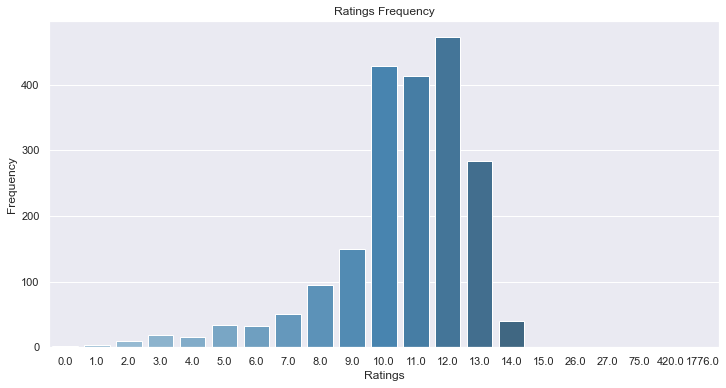

In [390]:
data = df_master.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x,y, palette='Blues_d', ax=ax)
ax.set(xlabel = 'Ratings', ylabel ='Frequency',title='Ratings Frequency')
plt.show()

* **Insight two: Let's look for the same distribution with boxplot**

C:\Users\Nvidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nvidia\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


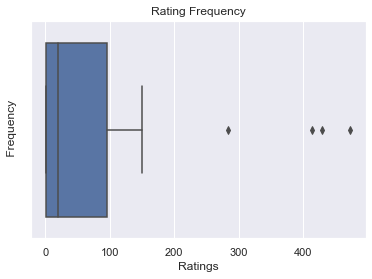

In [391]:
ax = sns.boxplot(data, orient='v',width =0.8)
ax.set(xlabel = 'Ratings', ylabel =' Frequency', title = 'Rating Frequency')
plt.show()

* **As we see that there are 2 outliers here so**

In [392]:
outliers_df = df_master[df_master.rating_numerator  > 400][['rating_numerator', 'name','jpg_url','text']]
outliers_df

,rating_numerator,name,jpg_url,text
799,"1,776.00",Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1778,420.00,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


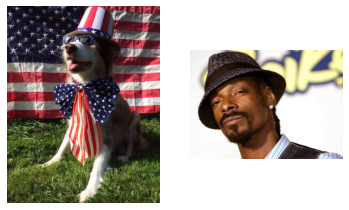

In [393]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c=1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' + str(index) + '_' + str(row['rating_numerator'])+ "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1,2,c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

* **As we see that the pic with rate 1778 is simply very cute and has the best rating score**

In [394]:
df_master.query('rating_numerator ==420')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,breed,confidence,retweet_count,favorite_count
1778,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.00,10,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.10,4324,7989


In [395]:
df_master.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 5.000e+00, 1.100e+01, 1.000e+01,
       6.000e+00, 1.500e+01, 0.000e+00, 7.500e+01, 2.700e+01, 3.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00, 1.776e+03, 2.600e+01,
       2.000e+00, 1.000e+00, 4.200e+02])

* **Next we can look for the relation retweet_count and favorite_count columns**

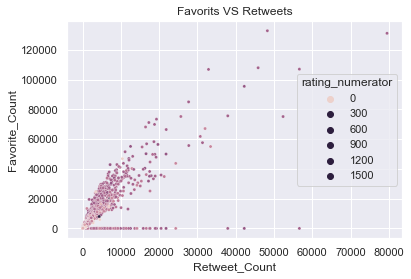

In [396]:
# Use scatter plot to show the relation 
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=10) 
ax.set(xlabel = 'Retweet_Count', ylabel ='Favorite_Count', title='Favorits VS Retweets')
plt.show()

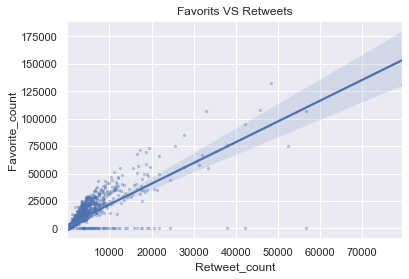

In [397]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df_master, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel ='Retweet_count', ylabel='Favorite_count',title='Favorits VS Retweets')
plt.show()

**So we have highly positive correlation between favorite_count & retweet_count**

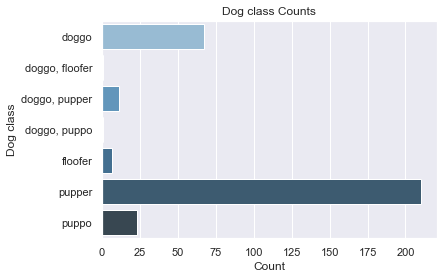

In [398]:
data = df_master.groupby('dog_class').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog class', title='Dog class Counts')
plt.show()

**As we see the most common class is the pupper**

* **Comparing tweets different sources**

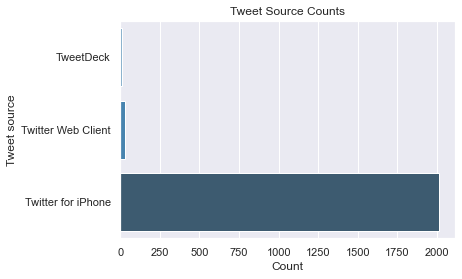

In [418]:
data= df_master.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count' ,ylabel= 'Tweet source', title= 'Tweet Source Counts')
plt.show()

**The most common way used from twitter user is 'Twitter for iphone'**

In [421]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.10,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.72,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.17,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.56,9774,41048


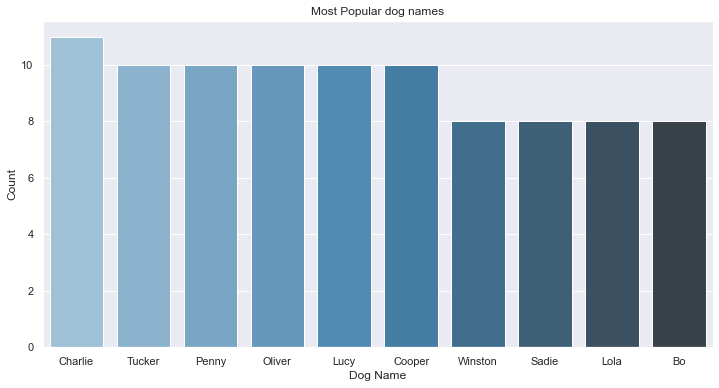

In [425]:
data = pd.read_sql("""SELECT name, COUNT(*) AS count
                        FROM master 
                    GROUP BY 1
                      HAVING name <> 'A'
                    ORDER BY 2 DESC
                       LIMIT 10;
                  """, engine)
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x='name', y='count', data=data, palette='Blues_d',ax=ax)
ax.set(ylabel='Count', xlabel='Dog Name', title='Most Popular dog names')
plt.show()

**The most popular dog is 'Charlie'**

### Let's Create a funny world cloud from our tweets text

In [434]:
text = " ".join(tweet for tweet in df_master.text)
print("There are {} words in the combination of all review.".format(len(text)))

There are 252806 words in the combination of all review.


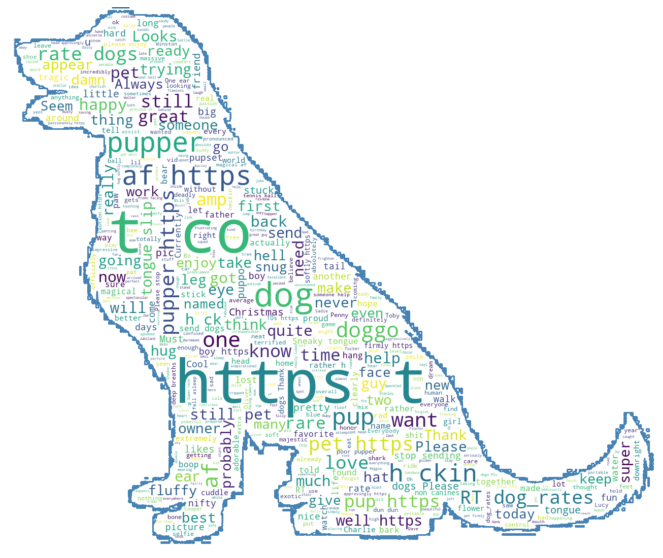

In [440]:
mask = np.array(Image.open('images/mask.jpeg'))
stopwords = set(STOPWORDS)
stopwords.update(['look', 'tho', 'see', 'good', 'hello', 'day', 'say', 'Meet'])
wordcloud = WordCloud(max_words=500, stopwords=stopwords,background_color='white', contour_width=3,contour_color='steelblue',mask=mask).generate(text)

#Display the generated text
#Useing matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/world_cloud.jpeg')
plt.show()

## Source

* [matplotlib]('https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html')
* [Kaggle]('https://www.kaggle.com/)
* [SQL for Data Analysis]('https://www.notion.so/SQL-for-Data-Analysts-a15cb656fbf74427a7c1f69185916170')
* How to generating WordClouds in Python at [DataCamp]('https://www.datacamp.com/community/tutorials/wordcloud-python')
* What is a Pupper? What is a Doggo? (DOGE Cameo) in [Lucidchart]('https://www.youtube.com/watch?v=ah6fmNEtXFI')

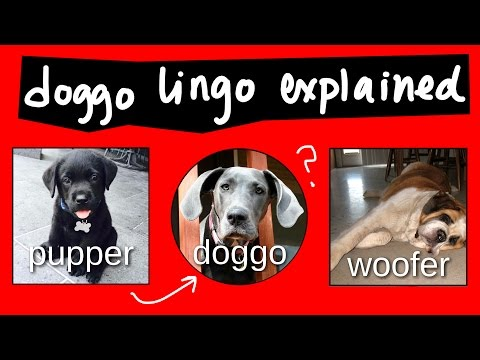

In [441]:
from IPython.display import YouTubeVideo

YouTubeVideo('ah6fmNEtXFI', width=800, height=500)